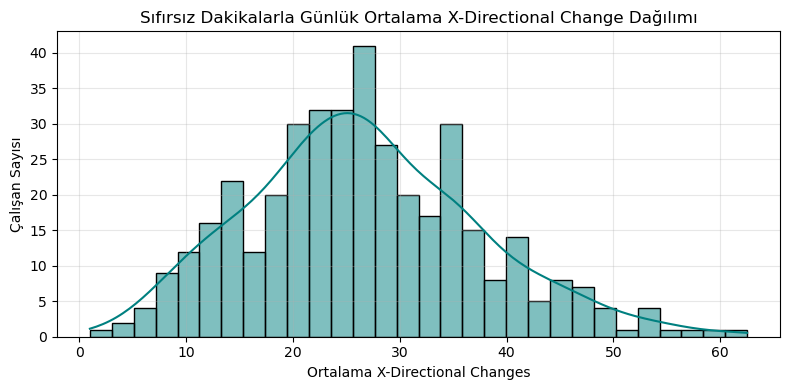

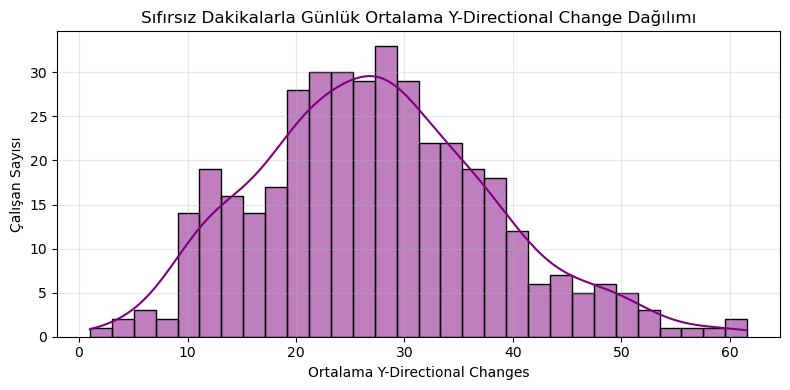

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Veri yükle
csv_path = r"C:\store\git\km-stat-activity\data\real\directional_bounding_box.csv"
df = pd.read_csv(csv_path)

# 2) Sıfır değişimli dakikaları filtrele
df = df[(df['x_direction_changes'] > 0) & (df['y_direction_changes'] > 0)]

# 3) Her kullanıcı için günlük ortalama directional change
user_avg = (
    df
    .groupby('profile_guid')[['x_direction_changes','y_direction_changes']]
    .mean()
    .reset_index(drop=True)
)

# 4a) X‐directional change için Histogram + KDE
plt.figure(figsize=(8,4))
sns.histplot(user_avg['x_direction_changes'], bins=30, kde=True, color='teal')
plt.title("Sıfırsız Dakikalarla Günlük Ortalama X-Directional Change Dağılımı")
plt.xlabel("Ortalama X-Directional Changes")
plt.ylabel("Çalışan Sayısı")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 4b) Y‐directional change için Histogram + KDE
plt.figure(figsize=(8,4))
sns.histplot(user_avg['y_direction_changes'], bins=30, kde=True, color='purple')
plt.title("Sıfırsız Dakikalarla Günlük Ortalama Y-Directional Change Dağılımı")
plt.xlabel("Ortalama Y-Directional Changes")
plt.ylabel("Çalışan Sayısı")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# 1) Veri yükle
csv_path = r"C:\store\git\km-stat-activity\data\real\directional_bounding_box.csv"
df = pd.read_csv(csv_path)

# 2) (İsteğe bağlı) Sıfır değişimli dakikaları atmak istersen:
# df = df[(df['x_direction_changes'] > 0) & (df['y_direction_changes'] > 0)]

# 3) Profil bazında ortalama directional change hesapla
avg = (
    df
    .groupby('profile_guid')[['x_direction_changes','y_direction_changes']]
    .mean()
    .reset_index()
)

# 4) Her ikisi de 50’den büyük olan profilleri süz ve ilk 5’ini al
mask = (avg['x_direction_changes'] > 50) & (avg['y_direction_changes'] > 50)
top5 = avg.loc[mask, 'profile_guid'].tolist()[:5]

print("Her iki directional change’i de 50’nin üzerinde olan ilk 5 profile_guid:")
for guid in top5:
    print(guid)


Her iki directional change’i de 50’nin üzerinde olan ilk 5 profile_guid:
1908dac0-7c0d-44a3-a109-628e1708c8bd


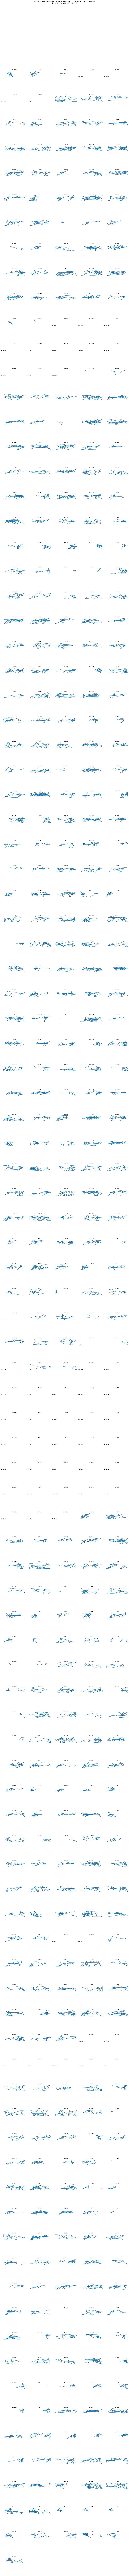

In [10]:
import pandas as pd
import ast
import math
import matplotlib.pyplot as plt

# 1) Ayarlar
csv_path = r"C:\store\git\km-stat-activity\data\real\directional_bounding_box.csv"
target   = "1908dac0-7c0d-44a3-a109-628e1708c8bd"

# 2) Veri oku ve profil bazında filtrele
df = pd.read_csv(csv_path, dtype={'x': str, 'y': str})
df_p = df.loc[df['profile_guid'] == target].copy()

# 3) String → liste çevir
def parse_list(s):
    try:
        return ast.literal_eval(s)
    except:
        return []

df_p['x_list'] = df_p['x'].apply(parse_list)
df_p['y_list'] = df_p['y'].apply(parse_list)

# 4) Global sınırları bul
all_x = [x for lst in df_p['x_list'] for x in lst]
all_y = [y for lst in df_p['y_list'] for y in lst]
xmin, xmax = min(all_x), max(all_x)
ymin, ymax = min(all_y), max(all_y)

# 5) Subplot ızgarası boyutlarını ayarla
n = len(df_p)
cols = 5
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3), 
                         sharex=True, sharey=True)
axes = axes.flatten()

# 6) Her dakika için çiz
for ax, (_, row) in zip(axes, df_p.iterrows()):
    x = row['x_list']
    y = row['y_list']
    if len(x) > 1 and len(y) > 1:
        ax.plot(x, y, linewidth=1)
    else:
        ax.text(0.5, 0.5, "No Data", ha='center', va='center')
    t = row['start_date_time'].split(' ')[1]  # sadece HH:MM:SS
    ax.set_title(t, fontsize=8)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect('equal', 'box')
    ax.axis('off')

# 7) Boş kalan eksenleri kapat
for ax in axes[n:]:
    ax.axis('off')

plt.suptitle(f"Profile {target} – Tüm Dakikalar İçin X–Y Hareketi\n"
             f"Ekran Boyutu: x[{xmin},{xmax}], y[{ymin},{ymax}]", fontsize=12)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()
